# Introducción

El objetivo de este informe es identificar cuál de las cuatro tiendas de la cadena **Alura Store** debería vender el Sr. Juan para iniciar un nuevo emprendimiento.

Para tomar la decisión se analizaran las siguientes dimensiones: ingresos totales, ventas por categoría, calificación promedio de clientes, productos más y menos vendidos y coste de envío promedio. Los resultados se basan en los datos consolidados de las 4 tiendas y en las visualizaciones generadas (barras, pastel y dispersión).




# Metodología
1. Se cargarán los cuatro datasets (`tienda`, `tienda2`, `tienda3`, `tienda4`) y se unificaran en `df_total`.
2. Se calcularán métricas por tienda: facturación total, calificación promedio, coste envío promedio, conteo de ventas por categoría y conteo por producto.
3. Se generarán gráficos para visualizar los hallazgos.
4. Se llegará a una conclusión.

# Importación de datos



In [36]:
# Importamos todas lass librerias que utilizaremos mas adelante
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#### **Analicemos si todas las columnas tienen las mismas columnas para poder concatenarlas y poder realizar un mejor analisis**

In [38]:
print("tienda vs tienda2:", tienda.columns.equals(tienda2.columns))
print("tienda vs tienda3:", tienda.columns.equals(tienda3.columns))
print("tienda vs tienda4:", tienda.columns.equals(tienda4.columns))

tienda vs tienda2: True
tienda vs tienda3: True
tienda vs tienda4: True


In [39]:
# Agregaremos una columna con el nombre de la tienda
try:
    tienda.insert(0, 'Tienda', 'Tienda 1')
    tienda2.insert(0, 'Tienda', 'Tienda 2')
    tienda3.insert(0, 'Tienda', 'Tienda 3')
    tienda4.insert(0, 'Tienda', 'Tienda 4')
except ValueError:
    print("La columna 'Tienda' ya existen")

# Y unimos todos los DataFrames
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [40]:
df_total.head()

,Tienda,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Tienda 1,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Tienda 1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Tienda 1,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Tienda 1,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Tienda 1,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#### Antes de profundizar en el análisis, revisemos la estructura básica de nuestros datos:
- Cantidad de registros y variables
- Tipos de datos que manejamos  
- Valores faltantes por atender

In [41]:
print("hay", len(df_total) , "datos en total")

hay 9435 datos en total


In [42]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tienda                  9435 non-null   object 
 1   Producto                9435 non-null   object 
 2   Categoría del Producto  9435 non-null   object 
 3   Precio                  9435 non-null   float64
 4   Costo de envío          9435 non-null   float64
 5   Fecha de Compra         9435 non-null   object 
 6   Vendedor                9435 non-null   object 
 7   Lugar de Compra         9435 non-null   object 
 8   Calificación            9435 non-null   int64  
 9   Método de pago          9435 non-null   object 
 10  Cantidad de cuotas      9435 non-null   int64  
 11  lat                     9435 non-null   float64
 12  lon                     9435 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [43]:
df_total.isnull().sum()

,0
Tienda,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0


In [44]:
df_total.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,9.435000e+03,9435.000000,9435.000000,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398,5.428909,-74.760108
std,5.903207e+05,31480.036346,1.390518,2.802776,2.355663,1.207155
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.520000e+04,3000.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.215000e+05,11700.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.633000e+05,34900.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,162500.000000,5.000000,24.000000,11.544440,-67.923900


In [45]:
df_total.describe(include='object')

,Tienda,Producto,Categoría del Producto,Fecha de Compra,Vendedor,Lugar de Compra,Método de pago
count,9435,9435,9435,9435,9435,9435,9435
unique,4,51,8,1185,14,19,4
top,Tienda 1,Mesa de noche,Muebles,06/02/2020,Izabela de León,Bogotá,Tarjeta de crédito
freq,2359,210,1886,18,744,3943,6898


Despues de ver toda esta informacion podemos llegar a la conclucion inicial que:

Datos limpios - sin valores faltantes

Tienda 1 es la más representada

Bogota domina las ventas geograficamente

Los clientes prefieren pagar con tarjeta

Muebles es la categoría estrella

#1. Análisis de facturación



In [46]:
# Agruparemos por tiendas
facturacion_por_tienda = df_total.groupby('Tienda')['Precio'].sum().sort_values(ascending=False)
print(facturacion_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


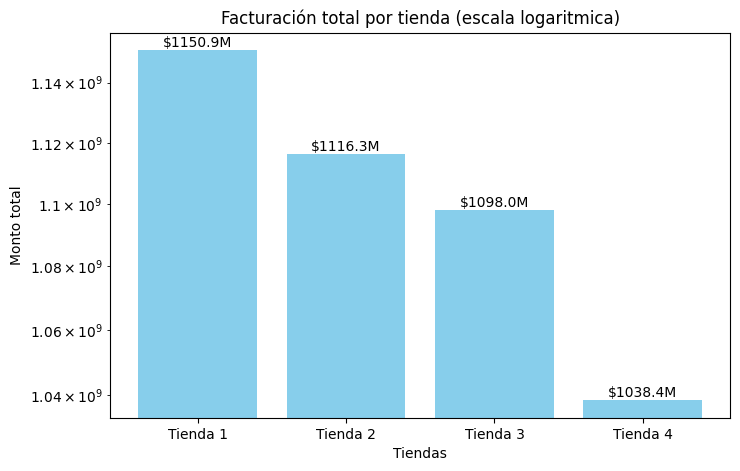

In [47]:
# Gráfico de barras
plt.figure(figsize=(8,5))
bars = plt.bar(facturacion_por_tienda.index, facturacion_por_tienda.values, color='skyblue')
#facturacion_por_tienda.plot(kind='bar', color='skyblue')
plt.title('Facturación total por tienda (escala logaritmica)')
plt.ylabel('Monto total')
plt.yscale('log')
# Agregar valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1e6:.1f}M', ha='center', va='bottom')
plt.xlabel('Tiendas')
plt.xticks(rotation=0)
plt.show()

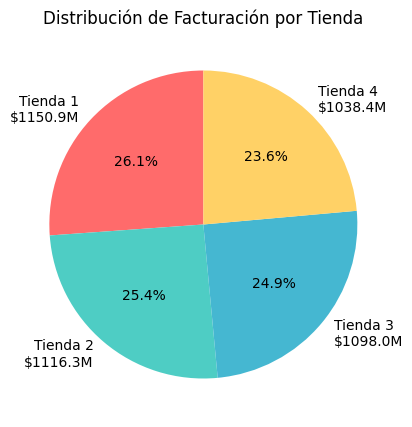

In [48]:
# Con porcentajes y valores en millones
plt.figure(figsize=(8, 5))
plt.pie(facturacion_por_tienda.values,
        labels=[f'{tienda}\n${valor/1e6:.1f}M' for tienda, valor in facturacion_por_tienda.items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFD166'])
plt.title('Distribución de Facturación por Tienda')
plt.show()

In [49]:
# Mostrar la diferencia real en porcentajes
for tienda, valor in facturacion_por_tienda.items():
    diferencia_porcentual = ((valor - facturacion_por_tienda.iloc[0]) / facturacion_por_tienda.iloc[0]) * 100
    print(f"{tienda}: {diferencia_porcentual:+.1f}% vs líder")

print(f"\nLa diferencia real es de ~{abs(diferencia_porcentual):.1f}%")

Tienda 1: +0.0% vs líder
Tienda 2: -3.0% vs líder
Tienda 3: -4.6% vs líder
Tienda 4: -9.8% vs líder

La diferencia real es de ~9.8%


Al analizar el total de facturación por tienda, observamos que la Tienda 4 presenta el menor volumen de ventas. Sin embargo, es importante destacar que la diferencia con respecto a las demás tiendas no es significativa en términos reales debido a la grafica en escala logaritmica (utilizada para mejorar la visualización de las diferencias pero que puede crear una percepción exagerada de las brechas entre tiendas).

**Diferencia Real**


En terminos porcentuales, la Tienda 4 solo se encuentra un 10% aproximadamente por debajo de la Tienda 1 (líder en ventas), lo que indica un desempeño relativamente equilibrado entre todas las sucursales.

# 2. Ventas por categoría

In [50]:
ventas_categoria = df_total.groupby(['Tienda', 'Categoría del Producto']).size().unstack()
ventas_categoria.head()

Categoría del Producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480


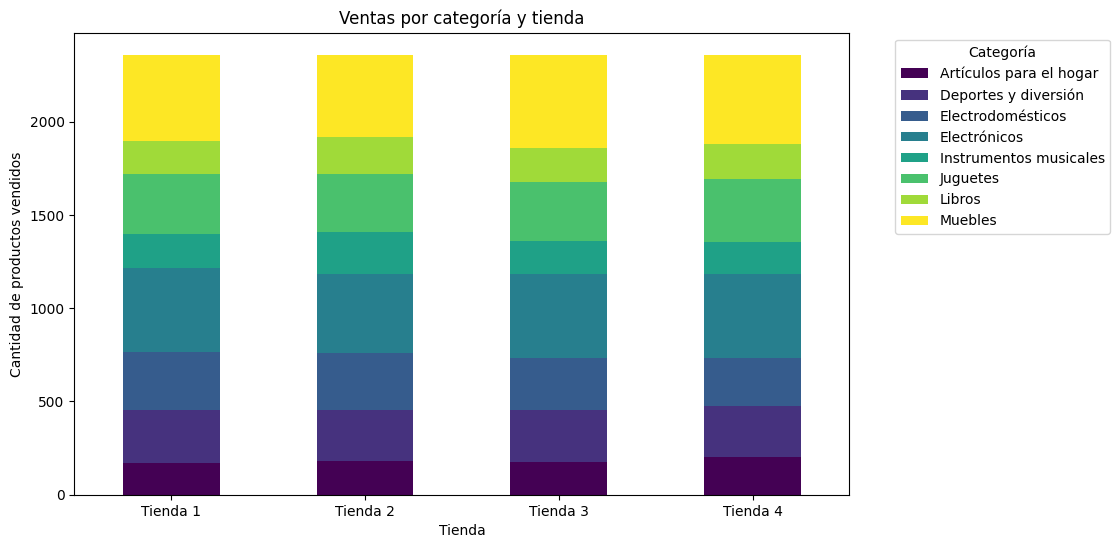

In [51]:
ventas_categoria.plot(kind='bar', stacked=True, figsize=(10,6),colormap='viridis')
plt.title('Ventas por categoría y tienda')
plt.ylabel('Cantidad de productos vendidos')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Categorias lideres:**

- Electronicos: Consistente líder en todas las tiendas (422-451 ventas)

- Muebles: Segunda categoría más fuerte (442-499 ventas)

- Juguetes: Tercer lugar estable (313-338 ventas)

**Desempeño por tienda:**

- Tienda 3: Lidera en Muebles (499) y Electrodomesticos (aunque no es su fuerte)

- Tienda 4: Destaca en Artículos para el hogar (201) y Juguetes (338)

- Tienda 1: Fuerte en Electrónicos (448) y Deportes (284)

- Tienda 2: Buen desempeño general, más balanceado

**Categorias menos vendidas:**

- Libros: Volumen más bajo en todas las tiendas (173-197)

- Instrumentos musicales: Bajo volumen constante (170-224)

# 3. Calificación promedio de la tienda


In [52]:
calificacion_promedio = df_total.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)
print(calificacion_promedio)

Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


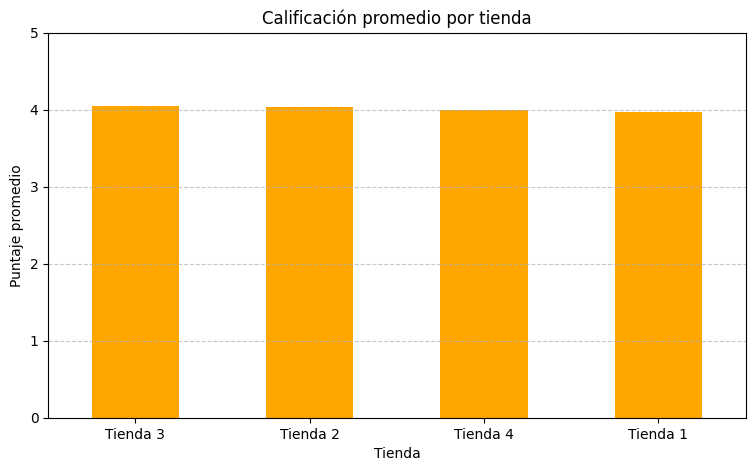

In [53]:
plt.figure(figsize=(9,5))
calificacion_promedio.plot(kind='bar', color='orange')
plt.title('Calificación promedio por tienda')
plt.ylabel('Puntaje promedio')
plt.ylim(0,5)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Todas las tiendas tienen calificaciones excelentes (>3.97/5)

La diferencia entre primera y última es solo 0.07 puntos

Calificación general muy alta en todas las sucursales

# 4. Productos más y menos vendidos

In [54]:
productos_populares = df_total['Producto'].value_counts().head(5)
productos_menos = df_total['Producto'].value_counts().tail(5)

In [55]:
#Productos mas vendidos
productos_populares.head()

,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201


In [56]:
#Productos menos vendidos
productos_menos.head()

,count
Producto,
Ciencia de datos con Python,166
Guitarra eléctrica,165
Mochila,163
Auriculares con micrófono,158
Celular ABXY,157


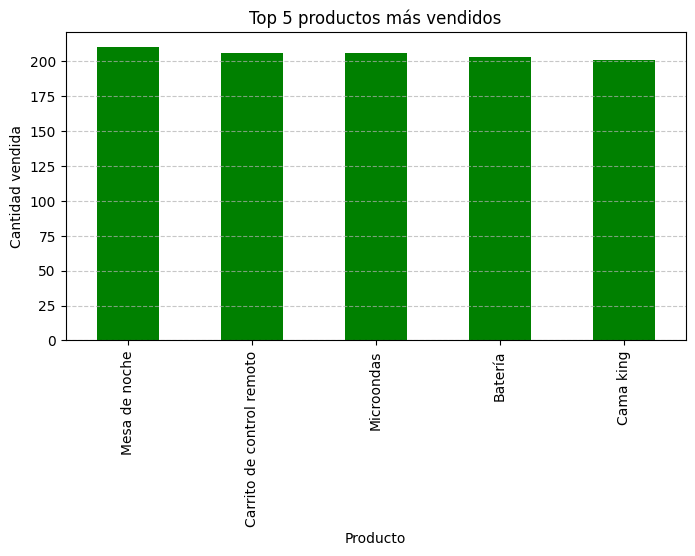

In [57]:
plt.figure(figsize=(8,4))
productos_populares.plot(kind='bar', color='green')
plt.title('Top 5 productos más vendidos')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Diferencia: 53 unidades entre 1° y último lugar

- Producto líder vende 34% más que el último

# 5. Envío promedio por tienda

In [58]:
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().sort_values()
print(envio_promedio)


Tienda
Tienda 4    23459.457167
Tienda 3    24805.680373
Tienda 2    25216.235693
Tienda 1    26018.609580
Name: Costo de envío, dtype: float64


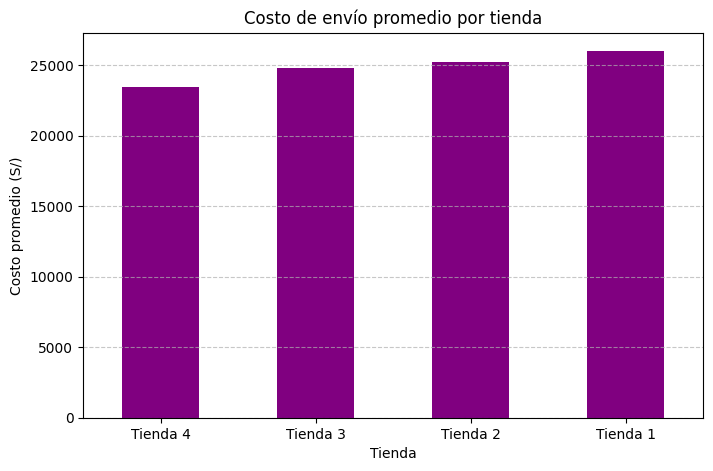

In [59]:

plt.figure(figsize=(8,5))
envio_promedio.plot(kind='bar', color='purple')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo promedio (S/)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Reducir costos de envío de Tienda 1 al nivel de Tienda 4 representaría un ahorro significativo en gastos

# Graficos finales


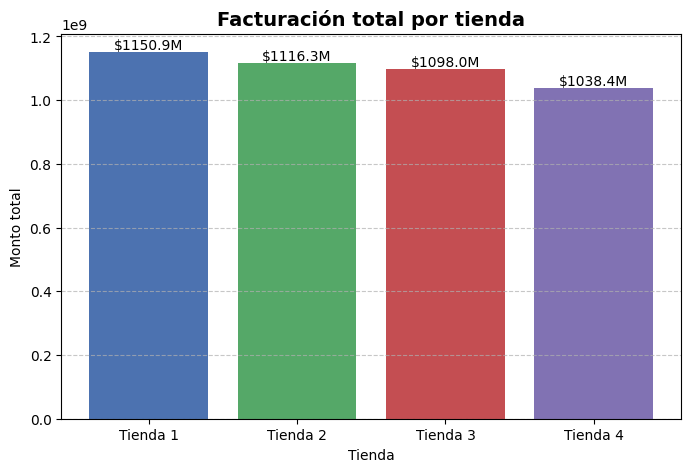

In [70]:
plt.figure(figsize=(8,5))
bars = plt.bar(facturacion_por_tienda.index, facturacion_por_tienda.values,
               color=['#4C72B0','#55A868','#C44E52','#8172B3'])
#facturacion_por_tienda.plot(kind='bar', color=['#4C72B0','#55A868','#C44E52','#8172B3'])
plt.title('Facturación total por tienda', fontsize=14, weight='bold')
plt.xlabel('Tienda')
plt.ylabel('Monto total')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height/1e6:.1f}M', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


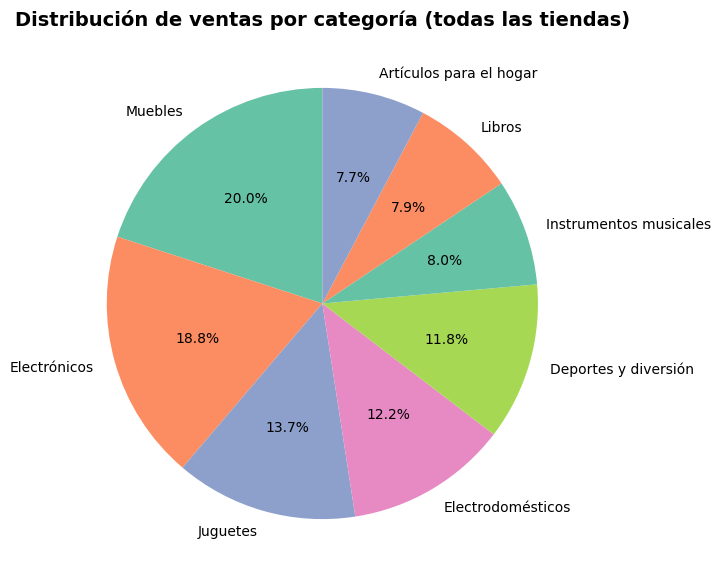

In [61]:
categoria_total = df_total['Categoría del Producto'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(categoria_total, labels=categoria_total.index, autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854'])
plt.title('Distribución de ventas por categoría (todas las tiendas)', fontsize=14, weight='bold')
plt.show()


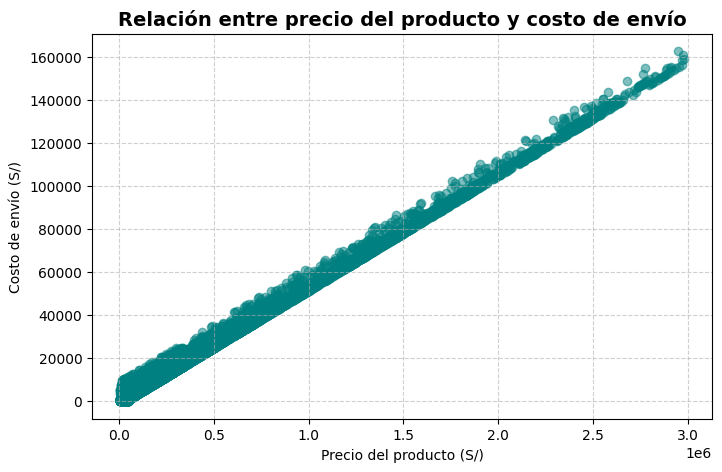

In [62]:
plt.figure(figsize=(8,5))
plt.scatter(df_total['Precio'], df_total['Costo de envío'], alpha=0.5, c='teal')
plt.title('Relación entre precio del producto y costo de envío', fontsize=14, weight='bold')
plt.xlabel('Precio del producto (S/)')
plt.ylabel('Costo de envío (S/)')
#plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


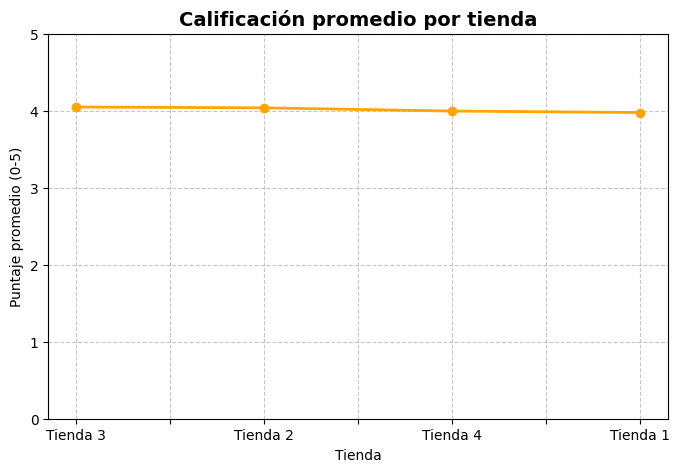

In [63]:
plt.figure(figsize=(8,5))
calificacion_promedio.plot(kind='line', marker='o', color='orange', linewidth=2)
plt.title('Calificación promedio por tienda', fontsize=14, weight='bold')
plt.xlabel('Tienda')
plt.ylabel('Puntaje promedio (0-5)')
plt.ylim(0,5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# **Conclusión general**

Tras analizar los principales indicadores de desempeño, se concluye que la Tienda 4 es la que presenta los resultados más bajos dentro del grupo.
Esta tienda registra la menor facturación total, lo que refleja un rendimiento financiero inferior frente a las demás. Además, no destaca en las categorías más rentables del mercado, y aunque mantiene calificaciones similares en satisfacción del cliente, esto no compensa su bajo nivel de ventas.

Por otro lado, la Tienda 1 se posiciona como la más sólida y rentable, mientras que las Tiendas 2 y 3 mantienen un desempeño estable y competitivo.

En este contexto, vender la Tienda 4 sería una decisión estratégica y financieramente acertada para el Sr. Juan, permitiéndole concentrar sus recursos en las tiendas con mejor desempeño y potencial de crecimiento